# Table of contents

1. [Introduction](#Introduction)

2. [Dataset](#Dataset)
    1. [Dataset Explanations](#Dataset-explanations)
    
    
3. [Step-by-step approach to EDA](#Step-by-step-approach-to-EDA)

    1. [Import and understand data](#import)
    
    2. [Data Cleaning](#cleaning)
        1. [Check data types and data characters mistakes](#cleaning-1)
        2. [Check for missing values, duplicate rows and replace](#cleaning-2)
        3. [Descriptive values summary](#cleaning-3)
        4. [Removing outliers](#cleaning-4)
        
    3. [Distribution and Relationship of Data](#relationship)
    
        1. [Distribution of continuous variable](#relationship-1)
        2. [Distribution of categorical variable](#relationship-2)
        3. [Categorical variables vs. Continuous variables](#relationship-3)
        
    4. [Future Updates](#updates)
        

<a id="Introduction"></a>
# Introduction

Data analysis has become increasingly popular and crucial because it makes studying huge amounts of data easier and more efficient. Before starting any data analysis, or proceeding data to machine learning, it is important to understand and clean the data to its suitable format. This process of understanding the dataset in depth is called Exploratory Data Analysis (EDA). If EDA is not done correctly, it may lead to false prediction and classification, possibly producing bias in future analysis. 

There are many approaches to perform EDA, and often times they are not fully discussed. As a beginner in analysis with R myself, the pre-processing of data are sometimes skipped, or hard to understand. In this analysis, I will attempt a novice solution as a guide for fellow starters, and myself to explore the insight of a data set with descriptive statistical values, histograms with different data types. 

<a id="Dataset"></a>
# Dataset

This is a Research Project involving analysis with R for BTEC330 Class (UMBC/TLST). This notebook is referenced from "[A detail description of the Heart Disease dataset](https://www.kaggle.com/code/carlosdg/a-detail-description-of-the-heart-disease-dataset)" by CARLOS DOMÍNGUEZ. 

The featured heart disease data set is found under Input section of this notebook, acquiring from UCI and hosted on Kaggle ([Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)), and it was from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). There are records of about 300 patients from Cleveland and the features are described in a following section.

For more information on context and terminology related to the disease, please visit the [original notebook](https://www.kaggle.com/code/carlosdg/a-detail-description-of-the-heart-disease-dataset)


<a id="Dataset-explanations"></a>
## Dataset Explanations

Please refer to the original notebook for reasons of ommitted/dropped data. Based on the reference notebook, the variable details are as followed:

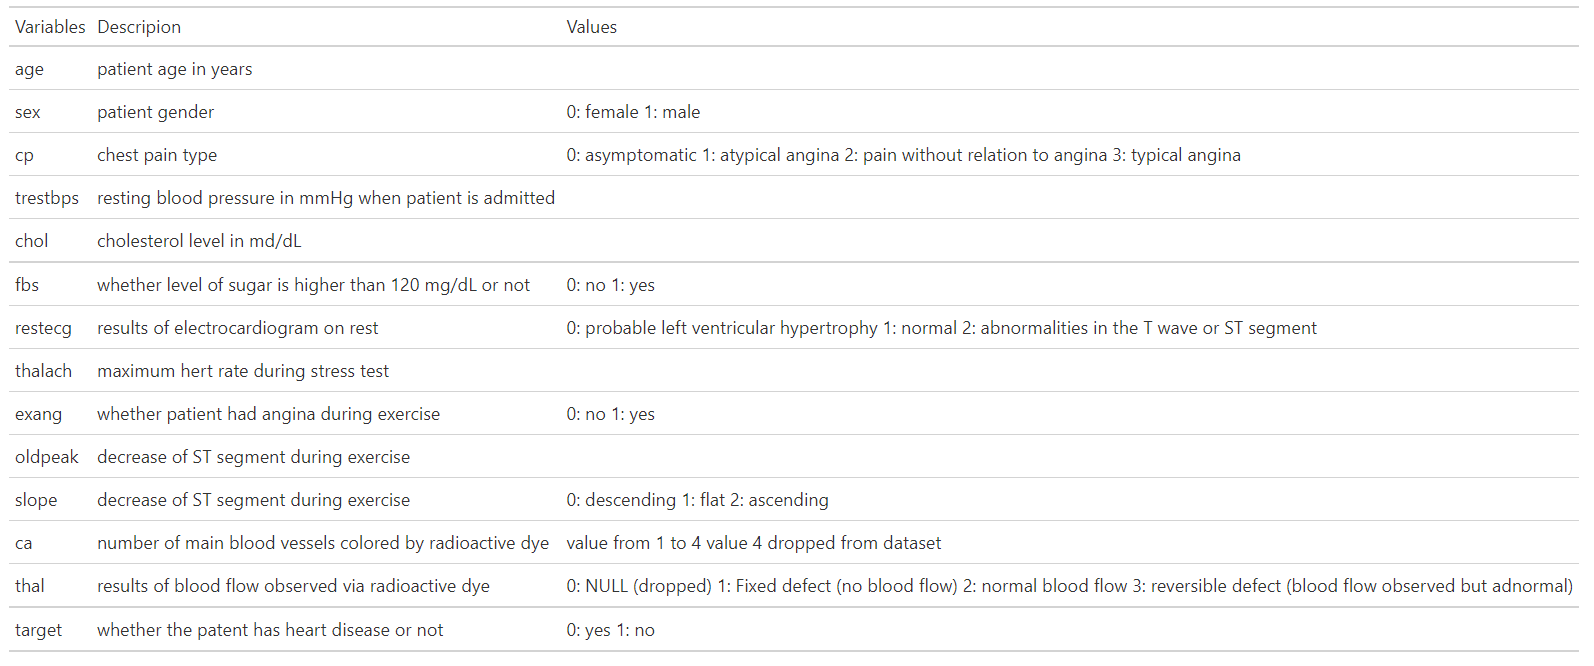

In [1]:
##Create a table to provide description and values for data:

## The code below should provide the same table as above picture.

## I am having trouble with left aligning data frame on Kaggle. It should work fine on RStudio) ##

# description.df <- data.frame(Variables = as.character(c(colnames(data[c(1:14)]))),
#                  Descripion = as.character(c("patient age in years",
#                                 "patient gender",
#                                 "chest pain type",
#                                 "resting blood pressure in mmHg when patient is admitted",
#                                 "cholesterol level in md/dL",
#                                 "whether level of sugar is higher than 120 mg/dL or not",
#                                 "results of electrocardiogram on rest",
#                                 "maximum hert rate during stress test",
#                                 "whether patient had angina during exercise",
#                                 "decrease of ST segment during exercise",
#                                 "decrease of ST segment during exercise",
#                                 "number of main blood vessels colored by radioactive dye",
#                                 "results of blood flow observed via radioactive dye",
#                                 "whether the patent has heart disease or not")),
#                  Values = as.character(c("",
#                             "0: female   1: male",
#                             "0: asymptomatic   1: atypical angina   2: pain without relation to angina   3: typical angina",
#                             "",
#                             "",
                            
#                             "0: no   1: yes",
#                             "0: probable left ventricular hypertrophy   1: normal   2: abnormalities in the T wave or ST segment",
#                             "",
#                             "0: no   1: yes",
#                             "",
#                             "0: descending   1: flat   2: ascending",
#                             "value from 1 to 4   value 4 dropped from dataset",
#                             "0: NULL (dropped)   1: Fixed defect (no blood flow)   2: normal blood flow   3: reversible defect (blood flow observed but adnormal)",
#                             "0: yes   1: no")
#                             )
#                  )
# description.df

#If you are running on R-studio, please uncomment the code for gt table version of this data frame.
# install.packages("gt")
# library(gt)
# gt(descripion.df)

<a id="Step-by-step-approach-to-EDA"></a>
# Step-by-step approach to EDA
Before starting, it is my practice to always check my working directory with getwd(), and setwd() if I'm not in my desired folder.
Here, were are working with the dataset from the reference notebook. However, in most cases, the datas retrieved from databases, such as GEO, are usually zipped files in the downloaded folders. If the file is zipped, you can use terminal with appropriate command to unzip all zipped files.
e.g.: unzip ".txt.gz" in terminal using command:  gunzip *.gz

Additionally, it's good to put the raw data into a folder called raw data in the working directory.

<a id="import"></a>
## 1) Import and Understand the Data


First, let's install necessary packages, and load libraries needed for RStudio.

%update guide on package/library

In [2]:
#Install packages
#install.packages("tidyverse")


#Load libraries
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Next, let's import the heart disease data set that we want to pre-process. Then I will make a copy of the raw data by assigning in. By doing this we are not manipulating the actual date set and mistakenly altered it. As a beginner, I think it's good to always have the raw data set, and a copy opened to compare the changes between the two, especially for the later manipulation steps like data cleaning. 

Here, the file is in .csv format so I'll use read.csv()
*if the file is in .txt, use read.lim()
With these functions, the easiest way to locate the path is to click on the option "Copy Folder Path to Clipboard" in settings. 

Or follow this format and change accordingly: '~/current-working-dir/any-folder-inside/your-data-set.csv'


In [3]:
#Import raw data from Kaggle Input
heart.data.raw <- read.csv('../input/heart-disease-uci/heart.csv')
#View(heart.data.raw)

#create a copy of raw data to manipulate. By doing this, we are not manipulating the actual date set and mistakenly altered it, especially novice level.
data <- heart.data.raw
#View(data)


There are several functions in R for us to ket to know the dataset overall, or take a peek at it. Overall, for the raw data set, we have 303 observantions (rows) with 14 variables.

In [4]:
print(dim(data))

[1] 303  14


Let's view the top and bottom 10 rows of the data:

In [5]:
head(data,10)

tail(data,10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
8,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
9,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
294,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
295,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
296,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
297,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Let's take a look at certain rows/collumns to make sure the data frame functions properly. For example, we want to view the values for cp variable:

In [6]:
#Take a look at desired rows/columns: data[rows,column]
head(data[3],10) #top 10 values cp column

,cp
,<int>
1,3
2,2
3,1
4,1
5,0
6,0
7,1
8,1
9,2


Or we want to view the values of specific rows, let's say we want to view row 3 only

In [7]:
data[3,] #all values in the first row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


We can also view values for multiple rows at a time, let's take a look at age, sex, and target to preview.

In [8]:
#Take a look at top 10 values for 3 seperate columns
head(data[c(1:2,14)],10)

,age,sex,target
,<int>,<int>,<int>
1,63,1,1
2,37,1,1
3,41,0,1
4,56,1,1
5,57,0,1
6,57,1,1
7,56,0,1
8,44,1,1
9,52,1,1


<a id="cleaning"></a>
## 2) Data Cleaning

<a id="cleaning-1"></a>
### Check data types and data characters mistakes

Our raw data is constructed into data frame, which is special type of list where every element of a list has same length. 

Statisically, our dataset has 3 types of variables, which are:
The variables types are

- Binary: sex, fbs, exang, target

- Categorical: cp, restecg, slope, ca, thal

- Continuous: age, trestbps, chol, thalac, oldpeak

In [9]:
#Gives a list of all variables in the dataset:

#not in order:
#ls(data) 

#in order, based on variables:
#colnames(data[c(1:14)])

The variable age seems to have a naming error "i...age". I will attempt to fix the name so that the variables are constructed similarly.

In [10]:
#Renaming column label
colnames(data)[1] <- "age"

#print to check
colnames(data[c(1:14)])

[1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"

We have to make sure that the variables have data types that are correctly classified in R. 

In [11]:
#Peak at the overall data types
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


<a id="cleaning-2"></a>
### Check for missing values, duplicate rows and replace

We see that the data types are mostly integers and numerics. In the case of categorical variable, in order to visualize these data on plots, we would have to change the data types into factors, which are special vectors that represent categorical data. While factors look (and often behave) like character vectors, they are actually integers with labels. Before transforming variable, we have to remove the null values to prevent undefined values error.

In [12]:
# Drop the null values
missing_ca_indeces <- which(data$ca %in% 4)
missing_thal_indeces <-which(data$thal %in% 0)
missing_values_indeces <- c(missing_ca_indeces, missing_thal_indeces)
data <- data[-missing_values_indeces, ]

# Transform categorical variable to R factors
data$sex <- as.factor(data$sex)
data$cp <- as.factor(data$cp)
data$fbs <- as.factor(data$fbs)
data$restecg <- as.factor(data$restecg)
data$exang <- as.factor(data$exang)
data$slope <- as.factor(data$slope)
data$thal <- as.factor(data$thal)
data$target <- as.factor(data$target)


Since the values for categorical data are mostly 0,1,2,3 to represent their details (refer to above), I decided to give a better label names for these factor values so it is easier to read and analyze.

In [13]:
# Give a better name to the factor values for the graphs
levels(data$sex) <- c("Female", "Male")
levels(data$cp) <- c("Asymptomatic", "Atypical angina", "No angina", "Typical angina")
levels(data$fbs) <- c("No", "Yes")
levels(data$restecg) <- c("Hypertrophy", "Normal", "Abnormalities")
levels(data$exang) <- c("No", "Yes")
levels(data$slope) <- c("Descending", "Flat", "Ascending")
levels(data$thal) <- c("Fixed defect", "Normal flow", "Reversible defect")
levels(data$target) <- c("Yes", "No")

#Now, view the data again to see the changes. Becareful when asigning names for levels. Make sure that the label matches its numerical value compared to the raw dataset.
head(data,10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>
1,63,Male,Typical angina,145,233,Yes,Hypertrophy,150,No,2.3,Descending,0,Fixed defect,No
2,37,Male,No angina,130,250,No,Normal,187,No,3.5,Descending,0,Normal flow,No
3,41,Female,Atypical angina,130,204,No,Hypertrophy,172,No,1.4,Ascending,0,Normal flow,No
4,56,Male,Atypical angina,120,236,No,Normal,178,No,0.8,Ascending,0,Normal flow,No
5,57,Female,Asymptomatic,120,354,No,Normal,163,Yes,0.6,Ascending,0,Normal flow,No
6,57,Male,Asymptomatic,140,192,No,Normal,148,No,0.4,Flat,0,Fixed defect,No
7,56,Female,Atypical angina,140,294,No,Hypertrophy,153,No,1.3,Flat,0,Normal flow,No
8,44,Male,Atypical angina,120,263,No,Normal,173,No,0.0,Ascending,0,Reversible defect,No
9,52,Male,No angina,172,199,Yes,Normal,162,No,0.5,Ascending,0,Reversible defect,No


Next, I need to make sure there are no duplicate rows in the data set. If the result returns TRUE, I would have to remove one of the duplicated ones. However, since the result returns FALSE, that means I have no duplicated data.

In [14]:
duplicated(data)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

<a id="cleaning-3"></a>
### Descriptive values summary

Descriptive statistics are values that describe or summarize the characteristics, or trends of the continuous variables for data set, such as mean, standard deviation, etc for analysis. Here we can view the overall summary of descriptive values

In [15]:
summary(data)

      age            sex                    cp         trestbps    
 Min.   :29.00   Female: 95   Asymptomatic   :141   Min.   : 94.0  
 1st Qu.:48.00   Male  :201   Atypical angina: 49   1st Qu.:120.0  
 Median :56.00                No angina      : 83   Median :130.0  
 Mean   :54.52                Typical angina : 23   Mean   :131.6  
 3rd Qu.:61.00                                      3rd Qu.:140.0  
 Max.   :77.00                                      Max.   :200.0  
      chol        fbs               restecg       thalach      exang    
 Min.   :126.0   No :253   Hypertrophy  :145   Min.   : 71.0   No :199  
 1st Qu.:211.0   Yes: 43   Normal       :147   1st Qu.:133.0   Yes: 97  
 Median :242.5             Abnormalities:  4   Median :152.5            
 Mean   :247.2                                 Mean   :149.6            
 3rd Qu.:275.2                                 3rd Qu.:166.0            
 Max.   :564.0                                 Max.   :202.0            
    oldpeak  

In my opinion, this function provides a summary of the mean median but it is not comprehensive. It is easier to filter the continuous variable, then calculate and generate a summary table as a data frame, round the values to 3 decimal places. Now the data are easier to observe and analyze.

In [16]:
cont_data <- select(data, age, trestbps, chol, thalach, oldpeak)

cont_data <- lapply(cont_data,as.numeric)
sum_table <- data.frame(
    Mean = sapply(cont_data,mean),
    Median = sapply(cont_data,median),
    Variance = sapply(cont_data,var),
    SD = sapply(cont_data,sd)
)
round(sum_table,digits=3)

,Mean,Median,Variance,SD
,<dbl>,<dbl>,<dbl>,<dbl>
age,54.524,56.0,82.074,9.059
trestbps,131.605,130.0,314.233,17.727
chol,247.155,242.5,2701.610,51.977
thalach,149.561,152.5,527.657,22.971
oldpeak,1.059,0.8,1.361,1.166


### Removing outliers

Outliers are values in the data set that are distinguishably different from the rest. These data can significantly distort a statistical model, such as trends and skewness of data, and statistical parameters such as mean and SD are highly sentitive to outliers. However, outliers are not always bad results, or bad observations. These outliers may present an important findings if it occur due to nature, or as we always say "randomness". It is advisable for statisticans to decide whether or not to remove outliers, depending how the outliers affect the data set. 

The best way to remove outliers for continuous data is to generate Box plots. Statistically, we can utilize z-score, or IQR to remove th eoutliers. Here, we will attempt to identify the outliers, and remove them with IQR.

Box plot for cholesterol level:

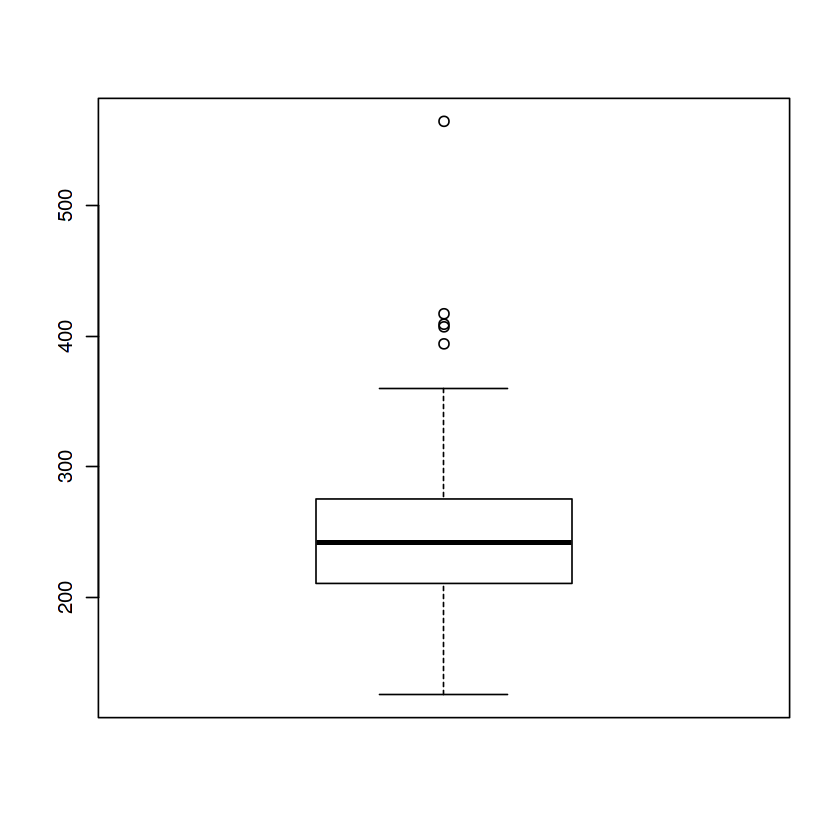

In [17]:
boxplot(data$chol)

You can see that there are a few data that fall out of the box plots. Take a look at the update boxplot without the ouliers:

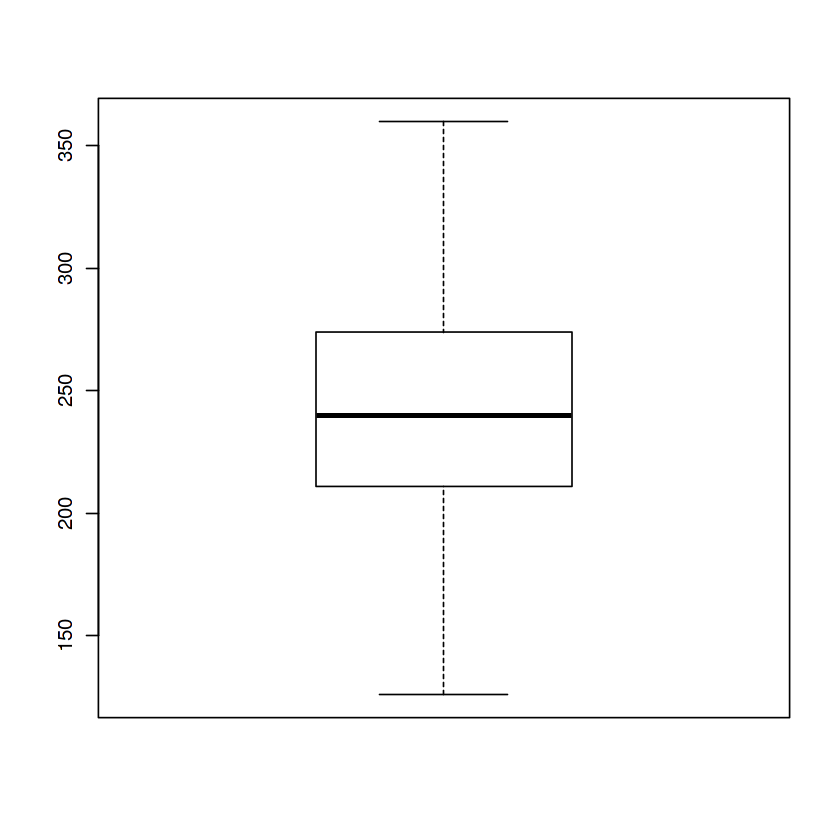

In [18]:
#Create a copy of the data 
data_sub <- data

#Create a function to calculate the data that are out of IQR range
remove_outlier <- function(x) {
    Q1 <- quantile(x, probs=.25)
    Q3 <- quantile(x, probs=.75)
    IQR <- IQR(x)
    upper_limit = Q3 + (IQR*1.5)
    lower_limit = Q1 - (IQR*1.5)
    x > lower_limit & x < upper_limit
}

#remove the outliers that are out of range
data_sub <- subset(data_sub,remove_outlier(data_sub$chol))
boxplot(data_sub$chol)

Box plot for age, chol, and thalach column before and after removing outliers

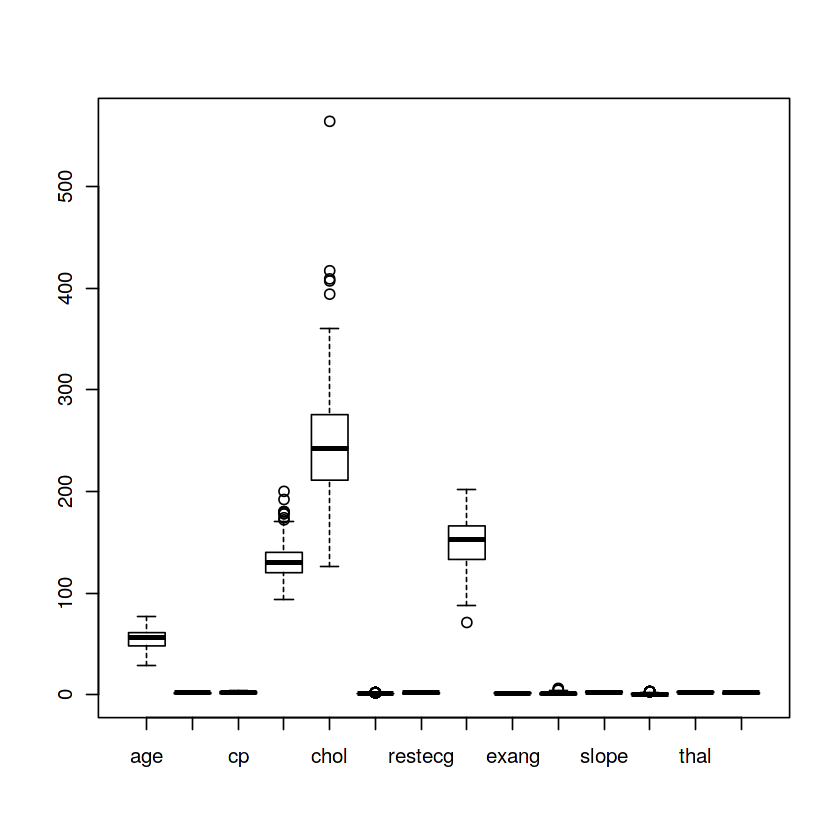

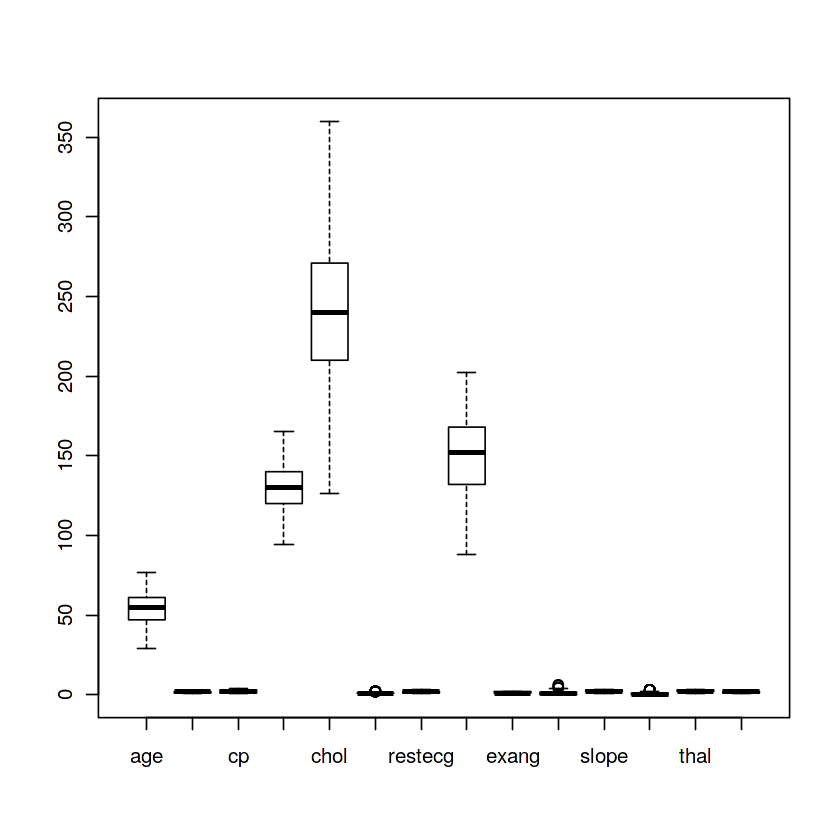

In [19]:
#original data boxplot
boxplot(data)

data_sub <- subset(data_sub,remove_outlier(data_sub$thalach))
data_sub <- subset(data_sub,remove_outlier(data_sub$trestbps))

#boxplot without outliers for age, chol, thalach
boxplot(data_sub)

Generally, one can create an R loop to find ouliers for all continuous variable. However, since this is my novice attempt to this analysis, only the targeted columns will have the outliers removed. I will not introduce R loop, but will update the analysis as I gain more concepts and fully understand them. Alternatively, ouliers can also be removed with ggplot boxplot

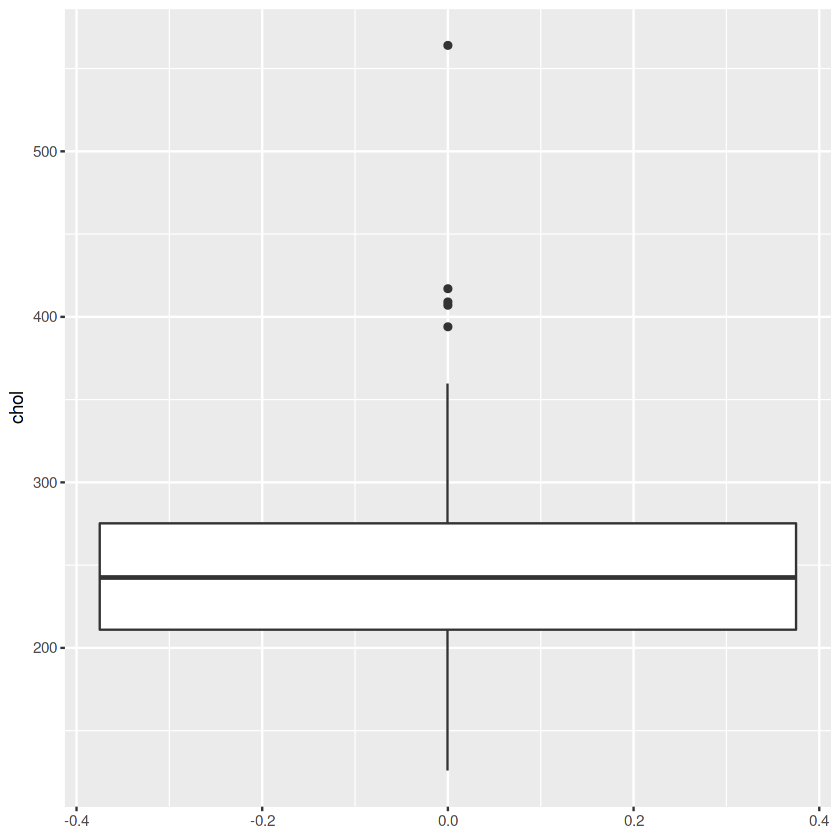

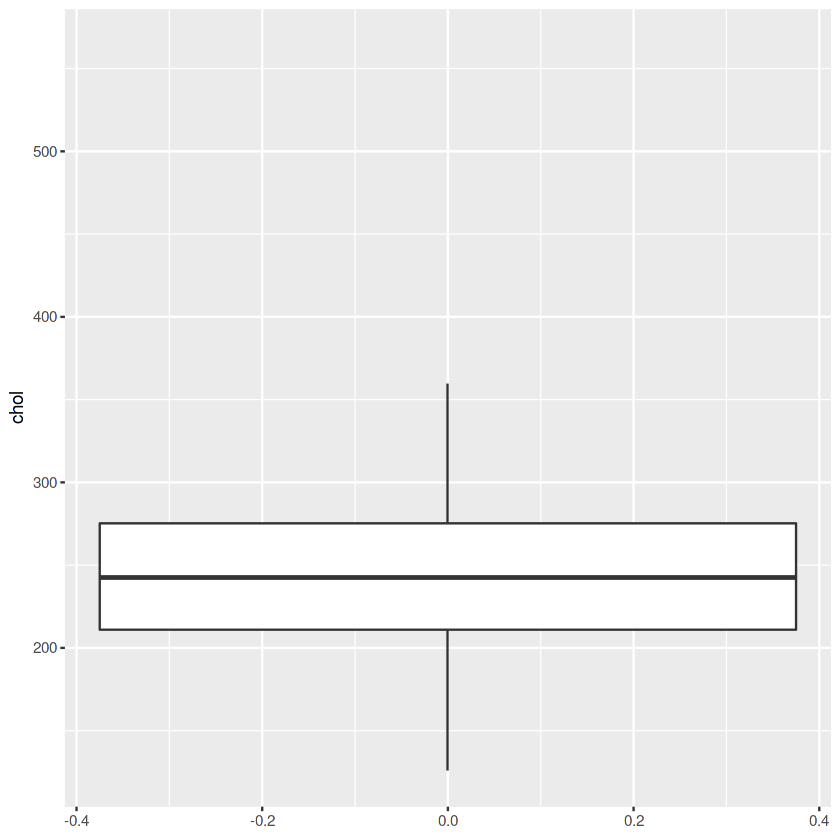

In [20]:
# Create ggplot with outliers
ggplot(data, aes(y=chol)) +
geom_boxplot()

#ggplot without outliers
ggplot(data, aes(y=chol)) +                             
  geom_boxplot(outlier.shape = NA)

<a id="relationship"></a>
## 3) Distribution and Relationship of Data

<a id="relationship-1"></a>
## Distribution for continuous data

### Age

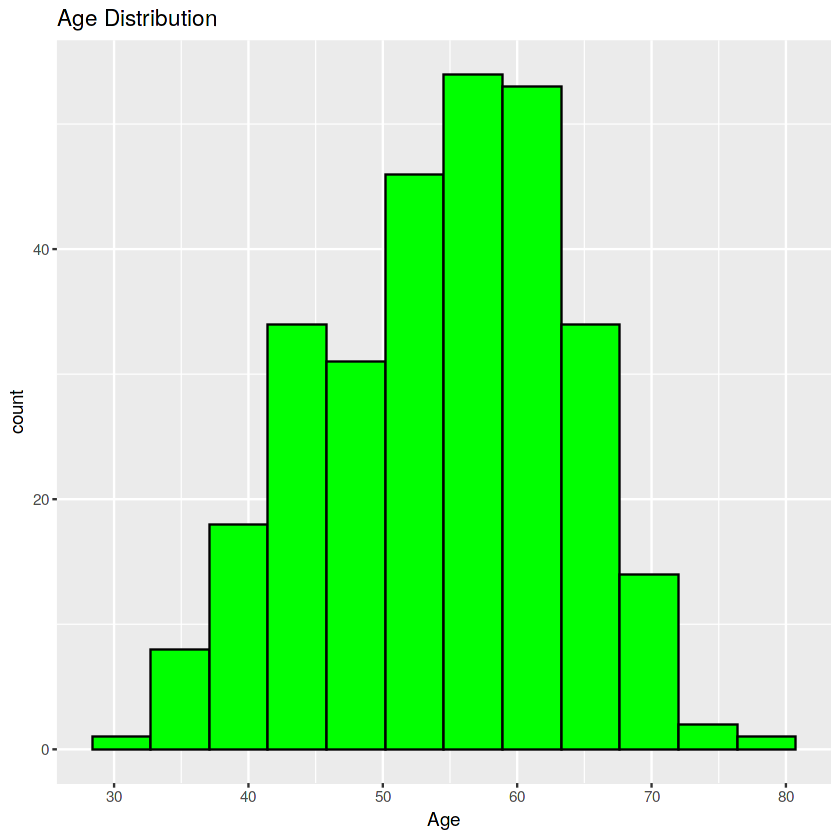

In [21]:
ggplot(data, aes(x=age))+
    geom_histogram(color = "black", fill = "green", bins = 12)+
    labs(x="Age", title = "Age Distribution")

### Trestbps

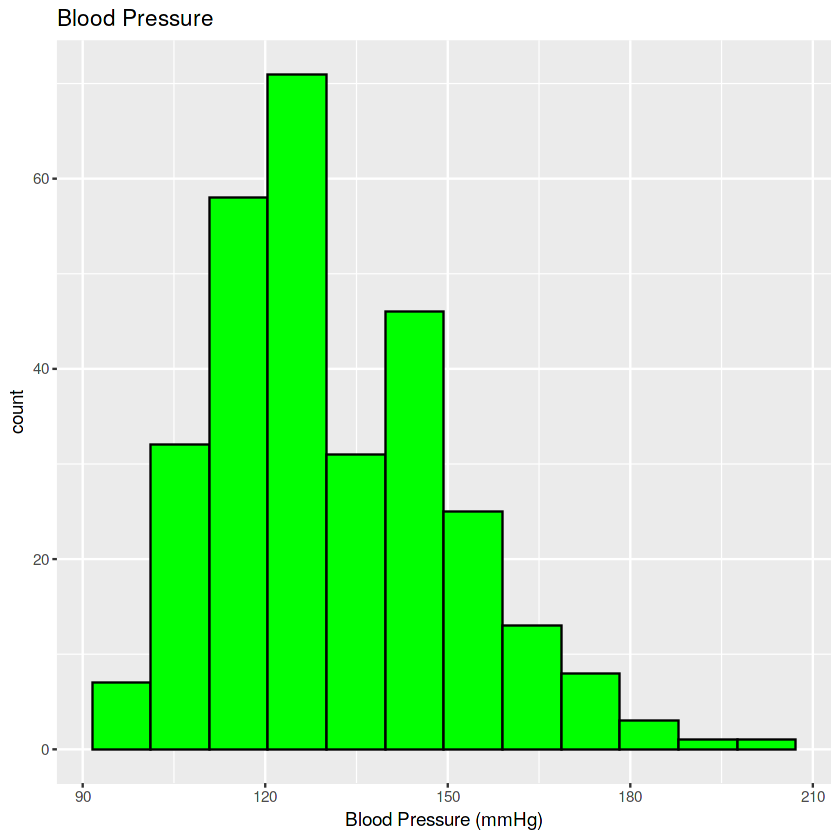

In [22]:
ggplot(data, aes(x=trestbps))+
    geom_histogram(color = "black", fill = "green", bins = 12)+
    labs(x="Blood Pressure (mmHg)", title = "Blood Pressure")

### Chol

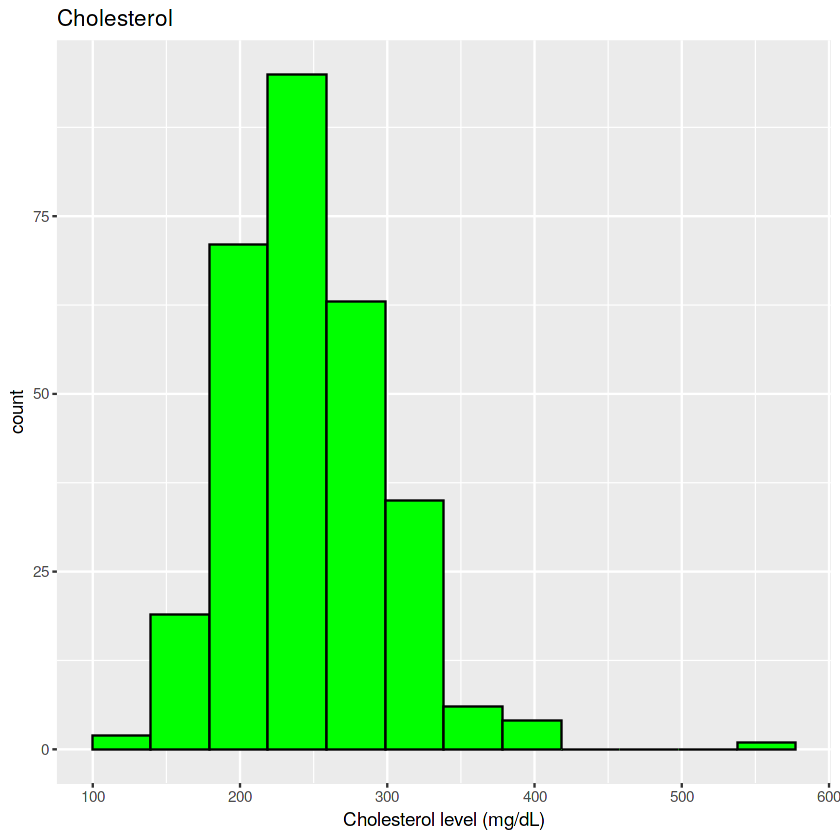

In [23]:
ggplot(data, aes(x=chol))+
    geom_histogram(color = "black", fill = "green", bins = 12)+
    labs(x="Cholesterol level (mg/dL)", title = "Cholesterol")

### Thalach

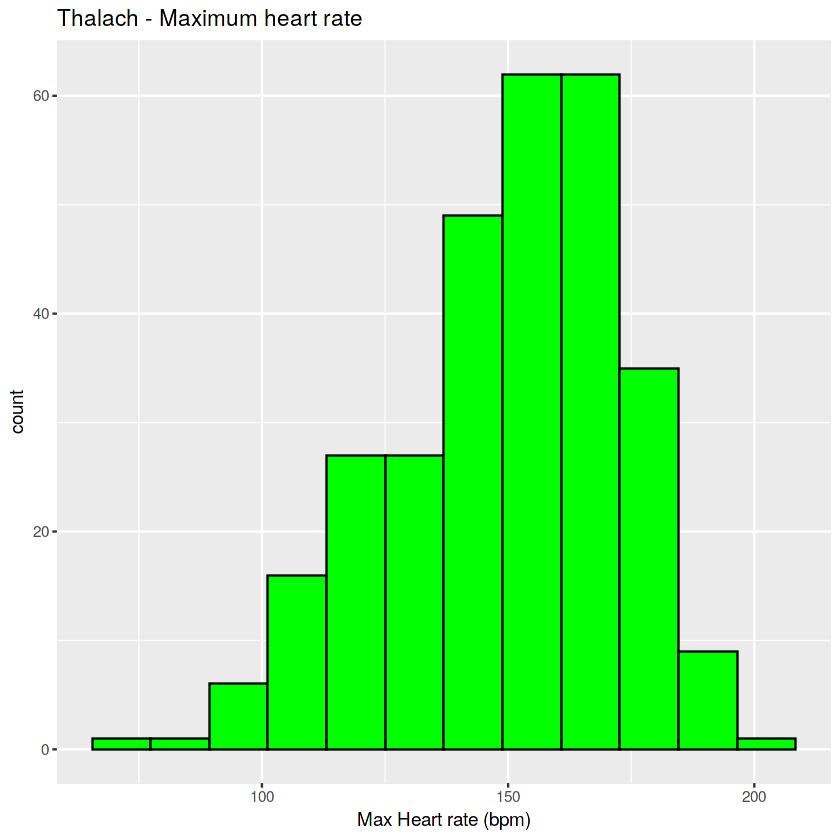

In [24]:
ggplot(data, aes(x=thalach))+
    geom_histogram(color = "black", fill = "green", bins = 12)+
    labs(x="Max Heart rate (bpm)", title = "Thalach - Maximum heart rate")

### Oldpeak

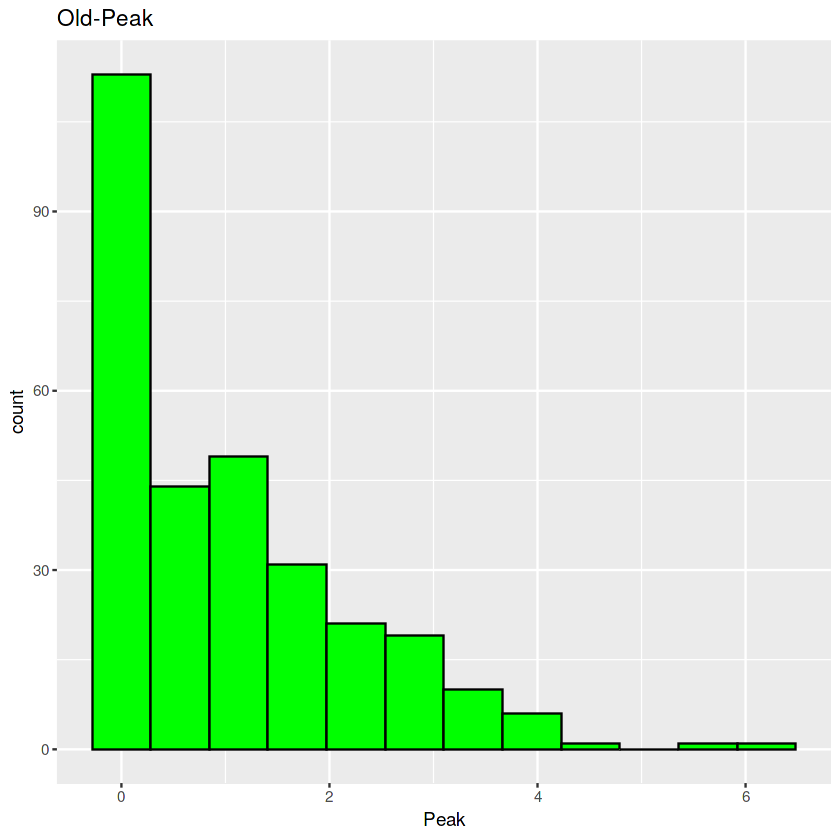

In [25]:
ggplot(data, aes(x=oldpeak))+
    geom_histogram(color = "black", fill = "green", bins = 12)+
    labs(x="Peak", title = "Old-Peak")

<a id="relationship-2"></a>
## Distribution for continuous data

### Target (healthy/sick)

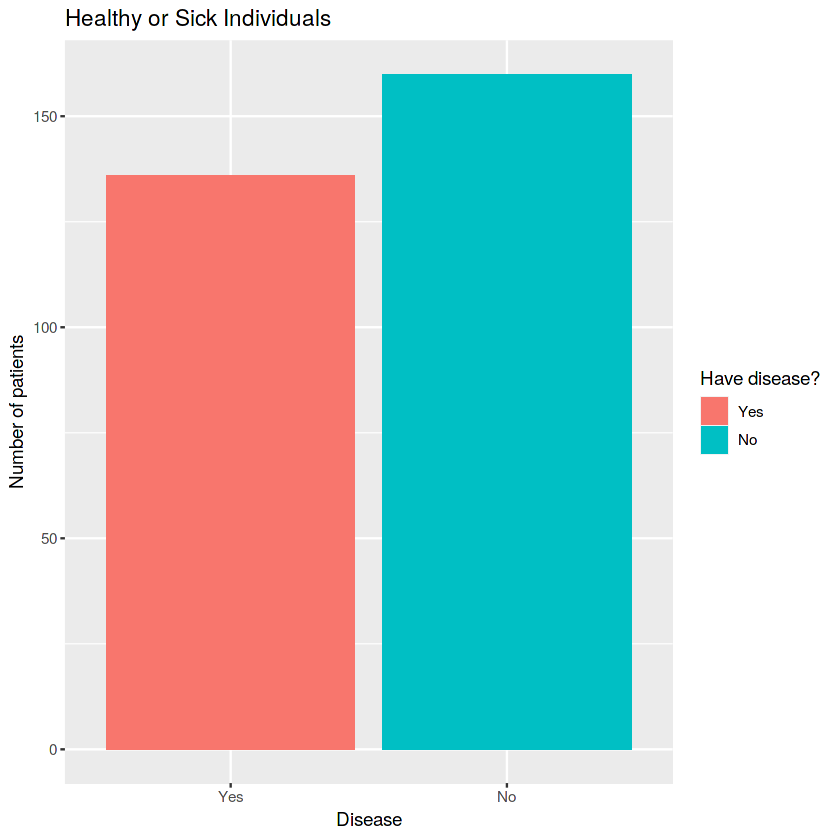

In [26]:
ggplot(data, aes(target, fill=target)) + 
    geom_bar() +
    labs(x="Disease", y="Number of patients",
         title = "Healthy or Sick Individuals") +
    scale_fill_discrete(name = "Have disease?")

### Sex

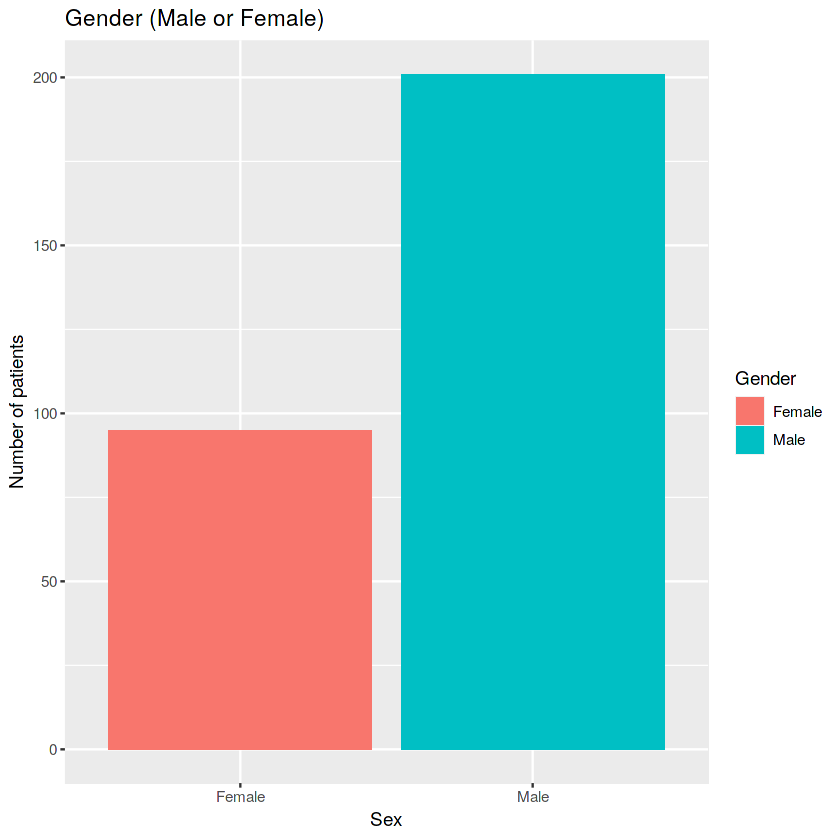

In [27]:
ggplot(data, aes(sex, fill=sex)) + 
    geom_bar() +
    labs(x="Sex", y="Number of patients",
         title = "Gender (Male or Female)") +
    scale_fill_discrete(name = "Gender")

### Chest pain type

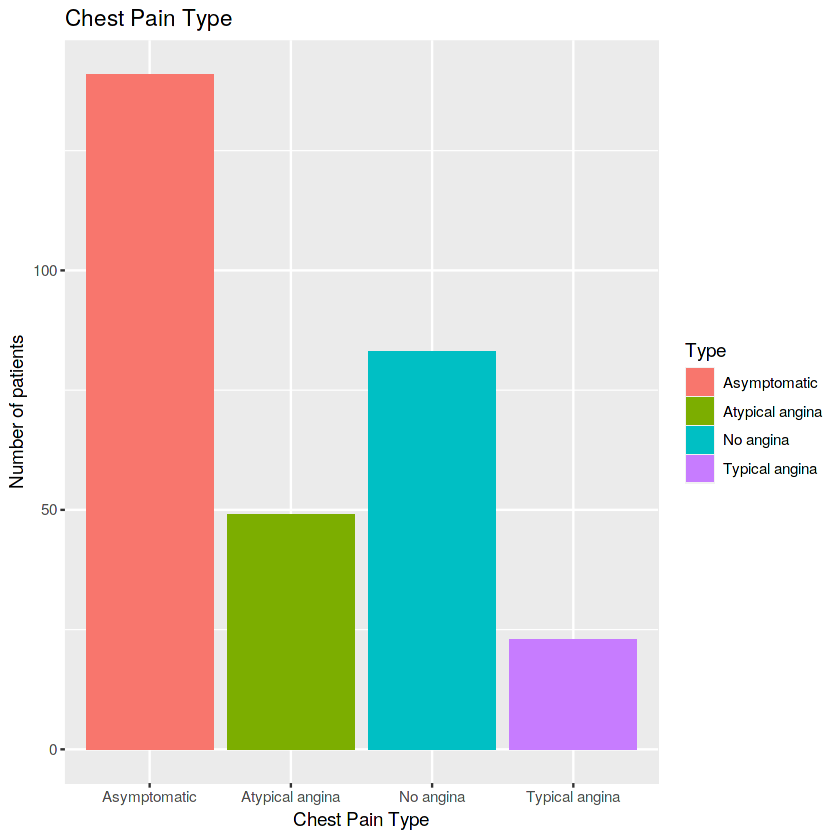

In [28]:
ggplot(data, aes(cp, fill=cp)) + 
    geom_bar() +
    labs(x="Chest Pain Type", y="Number of patients",
         title = "Chest Pain Type") +
    scale_fill_discrete(name = "Type")

### Fasting blood sugar

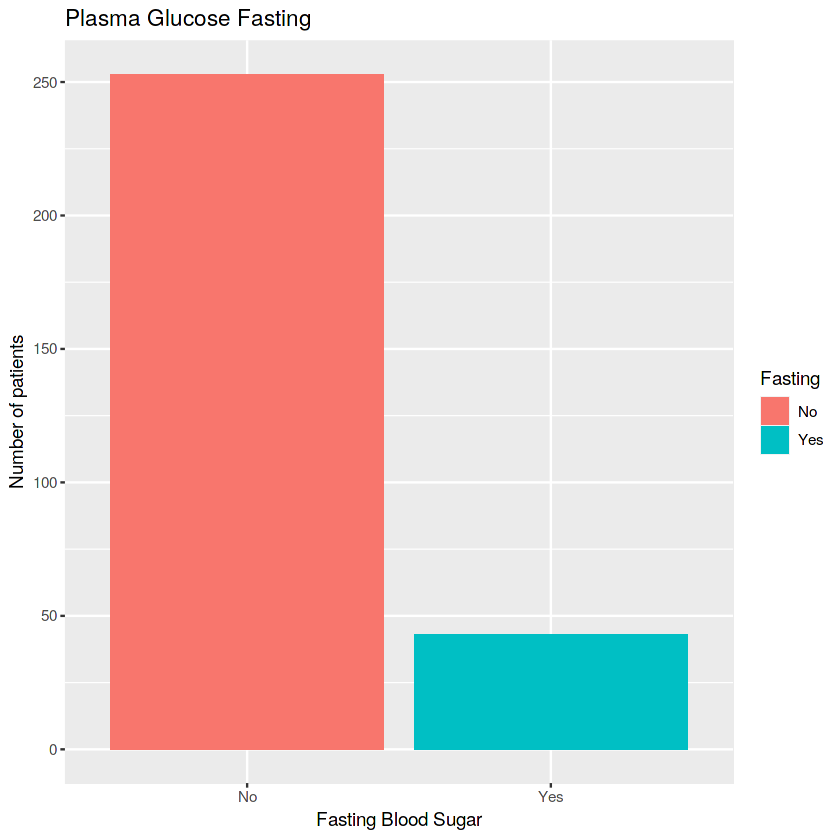

In [29]:
ggplot(data, aes(fbs, fill=fbs)) + 
    geom_bar() +
    labs(x="Fasting Blood Sugar", y="Number of patients",
         title = "Plasma Glucose Fasting") +
    scale_fill_discrete(name = "Fasting")

I have presented a few bar plots for categorical data. However, as we can see, the individual plots for categorical data do not describe any useful information in regards to relationship of the data among each other. Thus, we will attempt to plot the categorical data against the variable target (healthy/sick individuals) to observe the possible risk factors that led to the disease in patients.

<a id="relationship-3"></a>
## Relationship of continuous and categorical

### Gender vs Target

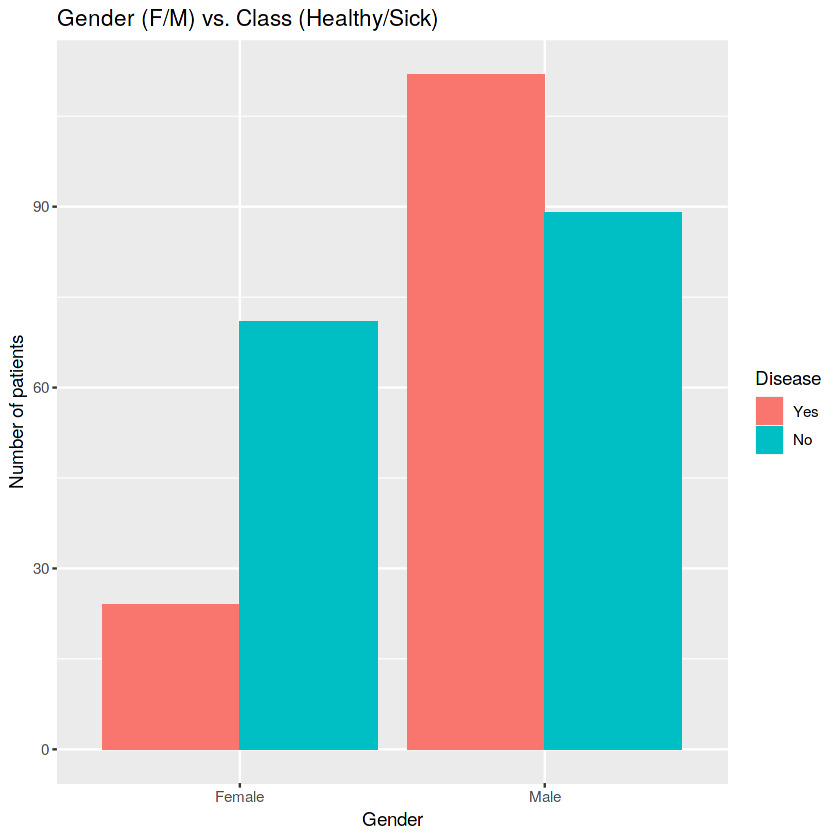

In [30]:
ggplot(data, aes(sex, fill=target)) + 
    geom_bar(position='dodge') +
    labs(fill="Disease", x="Gender", y="Number of patients",
         title = "Gender (F/M) vs. Class (Healthy/Sick)")

### Age vs Target

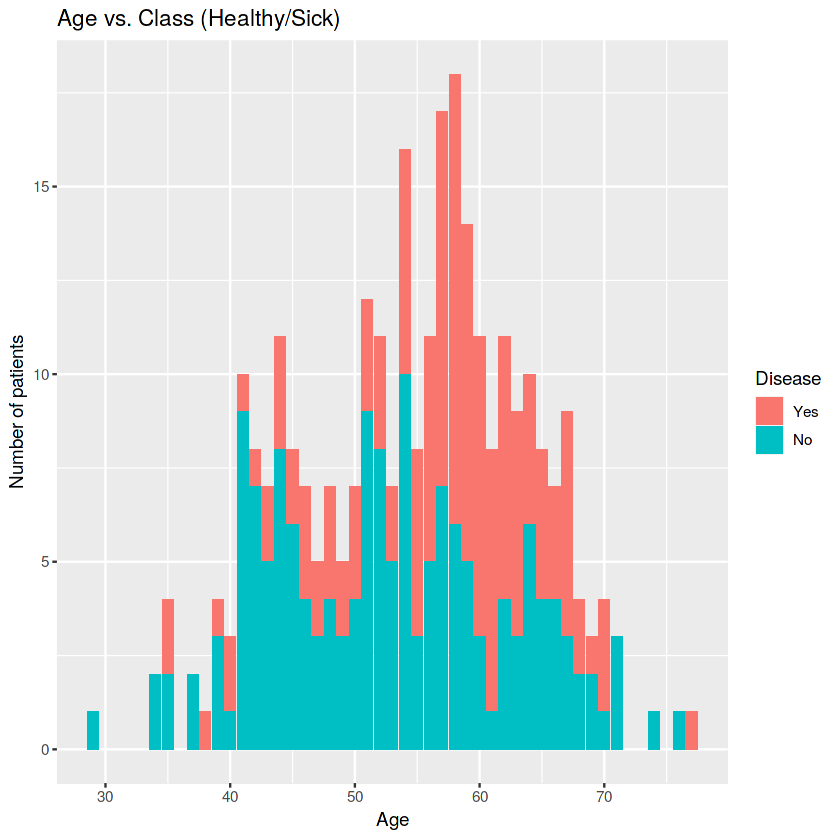

In [31]:
ggplot(data, aes(age, fill=target)) + 
    geom_bar() +
    labs(fill="Disease", x="Age", y="Number of patients",
         title = "Age vs. Class (Healthy/Sick)")

### Chest pain type vs Target

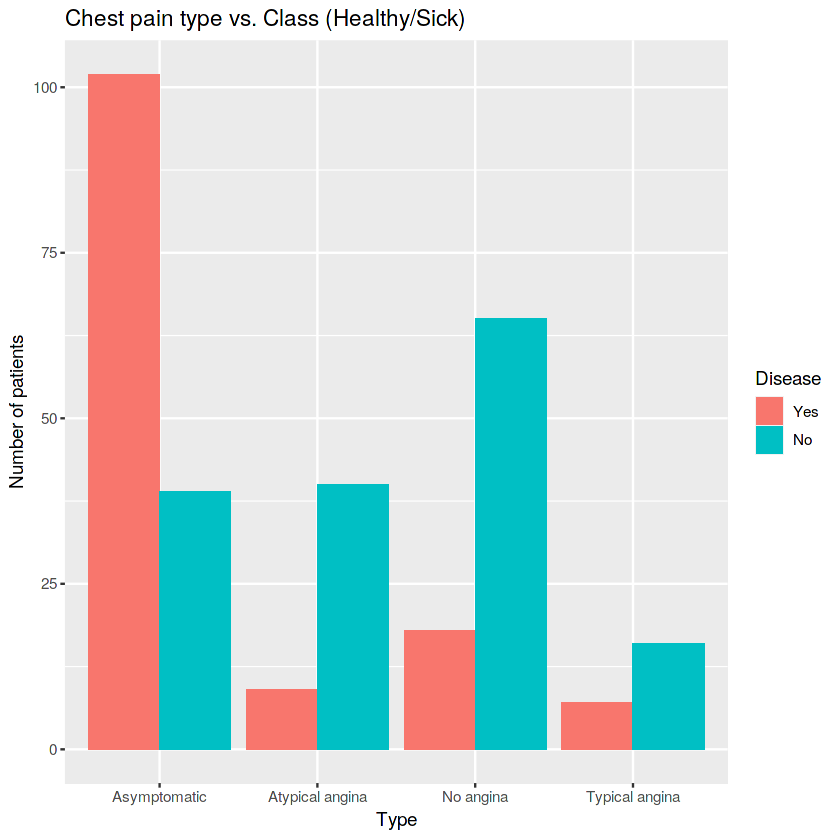

In [32]:
ggplot(data, aes(cp, fill=target)) + 
    geom_bar(position='dodge') +
    labs(fill="Disease", x="Type", y="Number of patients",
         title = "Chest pain type vs. Class (Healthy/Sick)")


### Slope vs Target

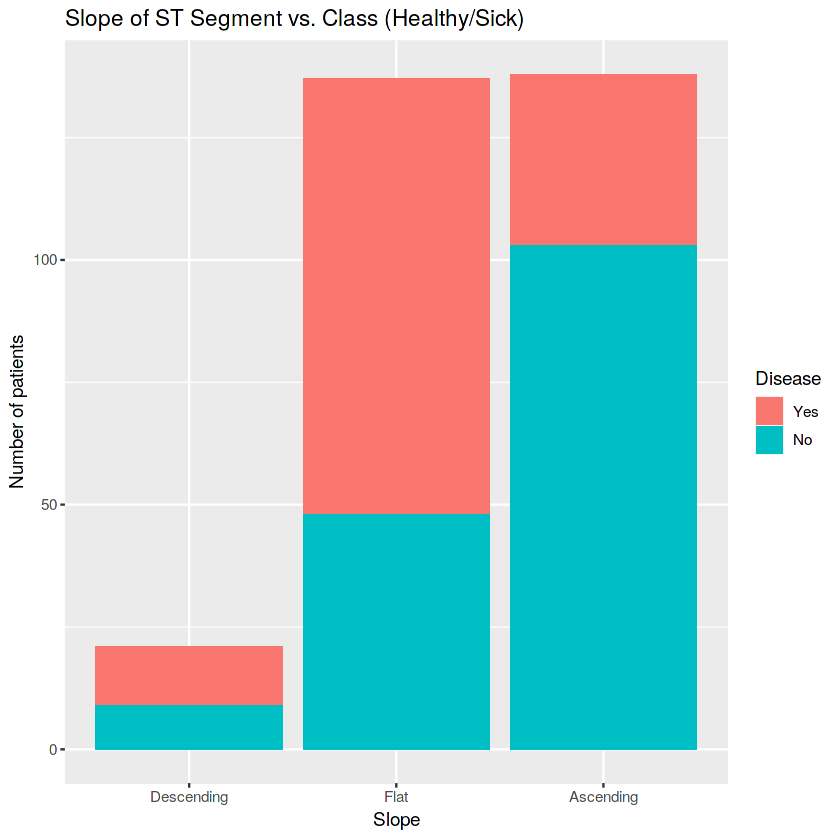

In [33]:
ggplot(data, aes(slope, fill=target)) + 
    geom_bar() +
    labs(fill="Disease", x="Slope", y="Number of patients",
         title = "Slope of ST Segment vs. Class (Healthy/Sick)")

### Fasting blood sugar vs Target

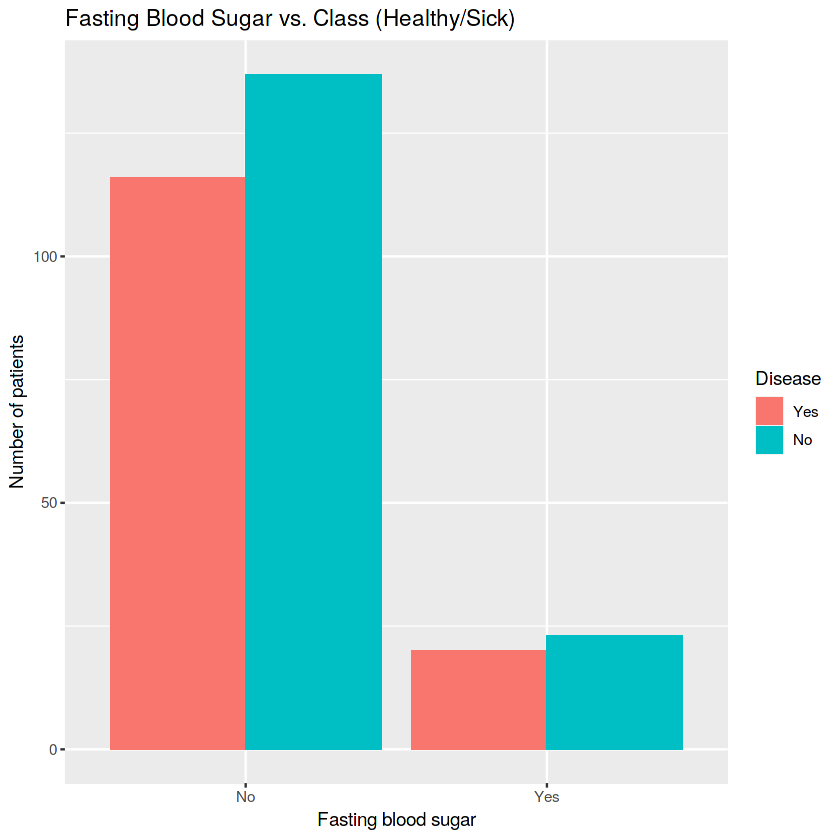

In [34]:
ggplot(data, aes(fbs,fill=target)) + 
    geom_bar(position='dodge') +
    labs(fill="Disease", x="Fasting blood sugar", y="Number of patients",
         title = "Fasting Blood Sugar vs. Class (Healthy/Sick)")

### Slope vs Oldpeak vs Target

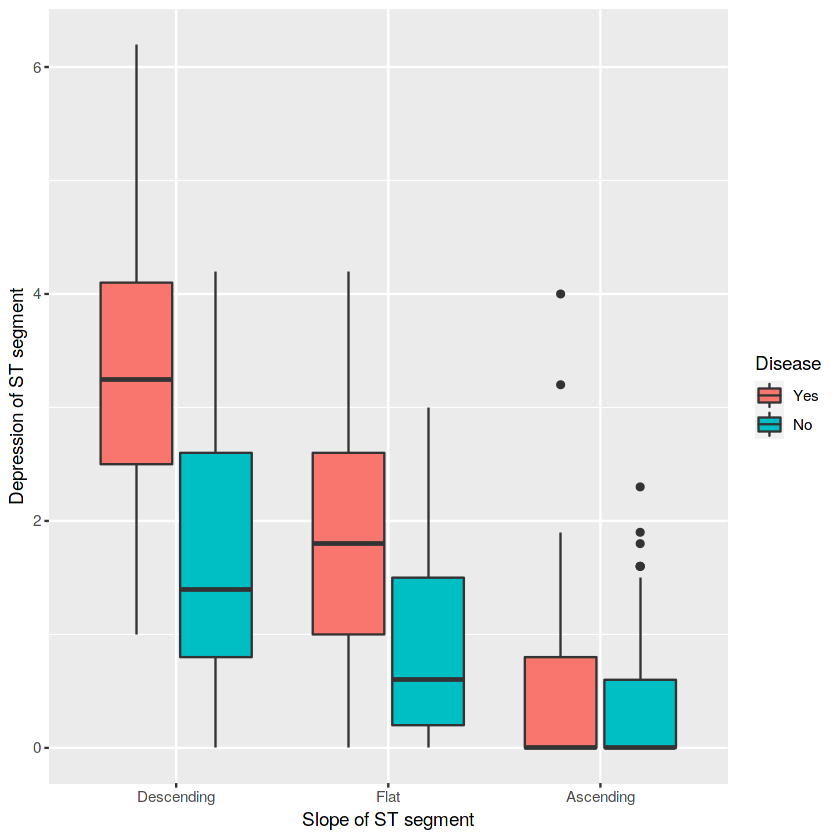

In [35]:
ggplot(data, aes(x=slope, y=oldpeak, fill=target)) +
    geom_boxplot() +
    labs(fill="Disease", x="Slope of ST segment", y="Depression of ST segment")

<a id="updates"></a>
# Future Updates

- More visualization: scatter plot, pairplots, correlation plots
- Frame work for hypothesis testing
- Automated EDA

Thank you for taking a look at my EDA and some general visualization. As a novice in coding, I'm trying my best to improve my knowledge and understanding in analysis using R/Python. As I'm builing my concepts and advancing in R, I will update and revamp the codes listed. However, for fellow starters and myself, sometimes it is overwhelming to start learning new things. I hope that this guide is approachable and easy to understand.

If there is any suggestion, correction, please feel free to give me an email. 